# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [1]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [2]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]
#After completing the assignment, try your code with all the features
# names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

Using a scatter plot to visualize the dataset

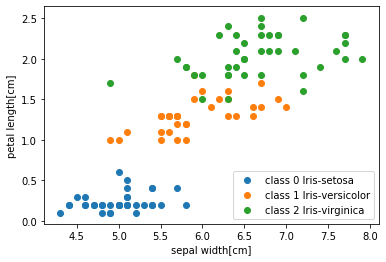

In [4]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

In [5]:
def euclidean_distance(x1, x2):
  #### TO-DO ##### 
    d = 0.
    for i in range(len(x1)):
        d += (x1[i]-x2[i])**2
    return d  
  ##############

In [6]:
import collections
def get_neighbors( X_train, y_train, x_test, k, distance=euclidean_distance):
  #### TO-DO #####  
    distance_table = []
    for i, train_data in enumerate(X_train):
        distance_table += [[distance(train_data, x_test), i]]
    # print(distance_table)
    distance_table.sort(key=lambda x: x[0])
    neighbors = collections.Counter()
    for neighbor in distance_table[:k]:
        neighbors[y_train[neighbor[1]]] += 1
  ##############
    return neighbors

In [7]:
def predict(X_train, y_train, X_test, y_test, k, misclassified, distance=euclidean_distance):
    len_test = len(X_test)
    for i in range(len_test):
        neighbors_cnt = get_neighbors(X_train, y_train, X_test[i], k, distance)
        predicted_label = neighbors_cnt.most_common()[0][0]
        true_label = y_test[i]
        if predicted_label != true_label:
            misclassified += [[i, X_test[i][0], X_test[i][1], y_test[i], predicted_label]]

    accuracy = (len_test - len(misclassified)) / len_test
    print("Accuracy for k = {}: {}".format(k, accuracy))
    return misclassified, accuracy

In [8]:
k = 1
misclassified = []
misclassified, accuracy = predict(X_train, y_train, X_test, y_test, k, misclassified)
misclassified = pd.DataFrame(misclassified, columns=['index', 'sepal length[cm]','petal width', 'true_label', 'predicted_label'])
print()
print("The misclassified test examples are the following: ")
misclassified

Accuracy for k = 1: 0.9210526315789473

The misclassified test examples are the following: 


,index,sepal length[cm],petal width,true_label,predicted_label
0,10,6.1,1.4,2,1
1,11,6.4,1.5,1,2
2,16,6.0,1.5,1,2


In [9]:
k = 3
misclassified = []
misclassified, accuracy = predict(X_train, y_train, X_test, y_test, k, misclassified)
misclassified = pd.DataFrame(misclassified, columns=['index', 'sepal length[cm]','petal width', 'true_label', 'predicted_label'])
print()
print("The misclassified test examples are the following: ")
misclassified

Accuracy for k = 3: 0.9736842105263158

The misclassified test examples are the following: 


,index,sepal length[cm],petal width,true_label,predicted_label
0,10,6.1,1.4,2,1


In [10]:
k = 5
misclassified = []
misclassified, accuracy = predict(X_train, y_train, X_test, y_test, k, misclassified)
misclassified = pd.DataFrame(misclassified, columns=['index', 'sepal length[cm]','petal width', 'true_label', 'predicted_label'])
print()
print("The misclassified test examples are the following: ")
misclassified

Accuracy for k = 5: 0.9473684210526315

The misclassified test examples are the following: 


,index,sepal length[cm],petal width,true_label,predicted_label
0,10,6.1,1.4,2,1
1,37,6.0,1.6,1,2


In [11]:
# Zero-R
train_counter = collections.Counter()
for label in y_train:
    train_counter[label] += 1

zero_r_label = train_counter.most_common()[0][0]
correct_cnt = sum([1 if label == zero_r_label else 0 for label in y_test])

len_test = len(X_test)
zero_r_accuracy = correct_cnt / len_test
print("The predicted label of Zero-R classifier is: ", zero_r_label)
print("The accuracy of Zero-R classifier is: ", zero_r_accuracy)

The predicted label of Zero-R classifier is:  2
The accuracy of Zero-R classifier is:  0.23684210526315788


In [12]:
# change distance function
def new_distance(x1, x2): 
    d = 0.
    for i in range(len(x1)):
        d += (abs(x1[i]-x2[i]))**1
    # print(d)
    return d  

In [13]:
k = 1
misclassified = []
accuracy = predict(X_train, y_train, X_test, y_test, k, misclassified, new_distance)
misclassified = pd.DataFrame(misclassified, columns=['index', 'sepal length[cm]','petal width', 'true_label', 'predicted_label'])
print()
print("The misclassified test examples are the following: ")
misclassified

Accuracy for k = 1: 0.9210526315789473

The misclassified test examples are the following: 


,index,sepal length[cm],petal width,true_label,predicted_label
0,10,6.1,1.4,2,1
1,11,6.4,1.5,1,2
2,16,6.0,1.5,1,2


In [14]:
k = 3
misclassified = []
accuracy = predict(X_train, y_train, X_test, y_test, k, misclassified, new_distance)
misclassified = pd.DataFrame(misclassified, columns=['index', 'sepal length[cm]','petal width', 'true_label', 'predicted_label'])
print()
print("The misclassified test examples are the following: ")
misclassified

Accuracy for k = 3: 0.9736842105263158

The misclassified test examples are the following: 


,index,sepal length[cm],petal width,true_label,predicted_label
0,10,6.1,1.4,2,1


In [15]:
k = 5
misclassified = []
accuracy = predict(X_train, y_train, X_test, y_test, k, misclassified, new_distance)
misclassified = pd.DataFrame(misclassified, columns=['index', 'sepal length[cm]','petal width', 'true_label', 'predicted_label'])
print()
print("The misclassified test examples are the following: ")
misclassified

Accuracy for k = 5: 0.9473684210526315

The misclassified test examples are the following: 


,index,sepal length[cm],petal width,true_label,predicted_label
0,10,6.1,1.4,2,1
1,37,6.0,1.6,1,2


In [16]:
# 5-fold cross-validation
fold_num = 5
sub_len = X_train.shape[0] // fold_num
print("subset length: ", sub_len)

subset length:  22


In [17]:
def kfoldCrossValidationforKNN(X, y, sub_len, fold_num, k):
    accuracy = 0.
    for i in range(fold_num):
        start, end = i*sub_len, (i+1)*sub_len
        X_valid = X[start:end]
        y_valid = y[start:end]
        X_train = np.concatenate((X[:start], X[end:]), axis = 0)
        y_train = np.concatenate((y[:start], y[end:]), axis = 0)
        misclassified = []
        misclassified, accuracy_i = predict(X_train, y_train, X_valid, y_valid, k, misclassified)
        # print("The accuracy for the {}th fold is: {}".format(i, accuracy_i))
        # print()
        accuracy += accuracy_i
    accuracy /= fold_num
    print("When k = {}(k-NN), the average accuracy of the {}-fold cross validation is: {}".format(k, fold_num, accuracy))
    print()
    return accuracy

In [18]:
res = []
k_values = [3, 7 ,9]
for k in k_values:
    accuracy = kfoldCrossValidationforKNN(X_train, y_train, sub_len, fold_num, k)
    res += [(accuracy, k)]
res.sort(key=lambda x: x[0], reverse=True)
print()
print("When k = {}, the accuracy is maximum: {}".format(res[0][1], res[0][0]))

Accuracy for k = 3: 0.8636363636363636
Accuracy for k = 3: 0.9545454545454546
Accuracy for k = 3: 0.9545454545454546
Accuracy for k = 3: 0.9545454545454546
Accuracy for k = 3: 0.9090909090909091
When k = 3(k-NN), the average accuracy of the 5-fold cross validation is: 0.9272727272727274

Accuracy for k = 7: 0.8636363636363636
Accuracy for k = 7: 1.0
Accuracy for k = 7: 0.9545454545454546
Accuracy for k = 7: 1.0
Accuracy for k = 7: 0.9090909090909091
When k = 7(k-NN), the average accuracy of the 5-fold cross validation is: 0.9454545454545455

Accuracy for k = 9: 0.8636363636363636
Accuracy for k = 9: 0.9545454545454546
Accuracy for k = 9: 0.9545454545454546
Accuracy for k = 9: 1.0
Accuracy for k = 9: 0.9090909090909091
When k = 9(k-NN), the average accuracy of the 5-fold cross validation is: 0.9363636363636363


When k = 7, the accuracy is maximum: 0.9454545454545455
